In [1]:
#Importing required libraries
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [ ]:
# Define the source and destination paths
source_path = '/content/On-tree mature coconut fruit detection.v1i.yolov11.zip'
destination_path = '/content/drive/My Drive/On-tree mature coconut fruit detection.v1i.yolov11.zip'

# Copy the file using shutil
import shutil
shutil.copy(source_path, destination_path)

'/content/drive/My Drive/On-tree mature coconut fruit detection.v1i.yolov11.zip'

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/On-tree mature coconut fruit detection.v1i.yolov11.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/coconut')

In [ ]:
!pip install tensorflow

In [ ]:
# Import necessary libraries for processing, modeling, and visualization
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from PIL import Image  # For image processing


**Preprocessing Images**

In [ ]:
# Define paths to training, validation, and testing image directories
train_set = '/content/coconut/train'
valid_set = '/content/coconut/valid'
test_set = '/content/coconut/test'

# Define image size and batch size
img_size = (128, 128)
batch_size = 32

# Function to load and preprocess images (resize and normalize)
def load_and_preprocess_image(img_path):
    img = Image.open(img_path).resize(img_size)  # Resize to 128x128
    img = np.array(img) / 255.0  # Normalize pixel values to [0,1]
    return img

**Loading Training, Validation, and Testing Data**

In [ ]:
# Create an ImageDataGenerator for the training set with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Create an ImageDataGenerator for validation and testing (only rescaling)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'  # Or 'binary' if you have only two classes
)

validation_generator = validation_datagen.flow_from_directory(
    valid_set,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 187 images belonging to 2 classes.
Found 53 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


**Visualization**

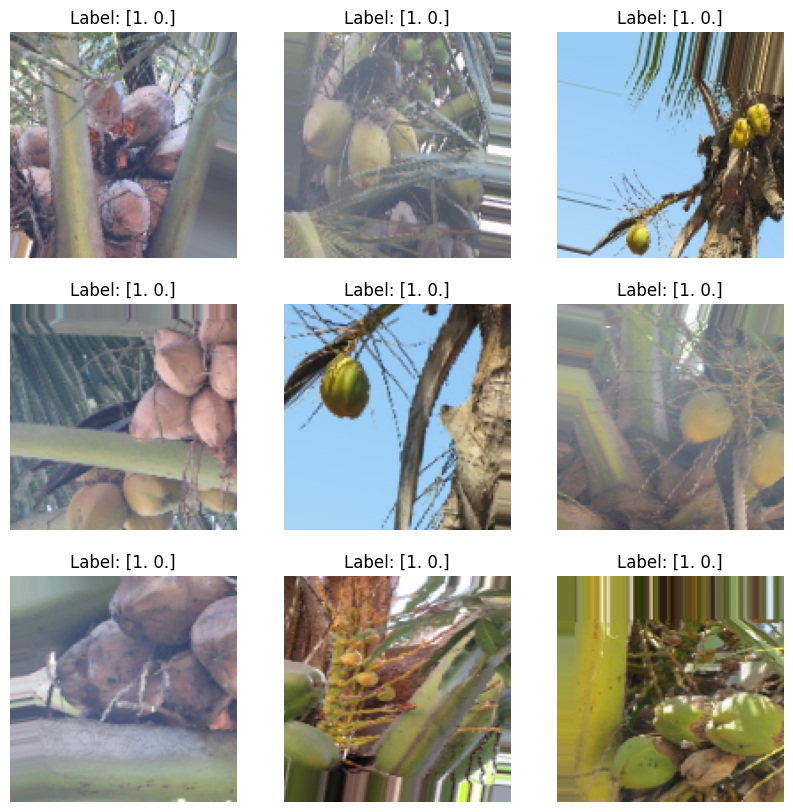

In [ ]:

# Get a batch of images and labels from the training generator
images, labels = next(train_generator)

# Display some sample images with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')
plt.show()

Image shape: (32, 128, 128, 3)
Label shape: (32, 2)
Image data type: float32
Label data type: float32


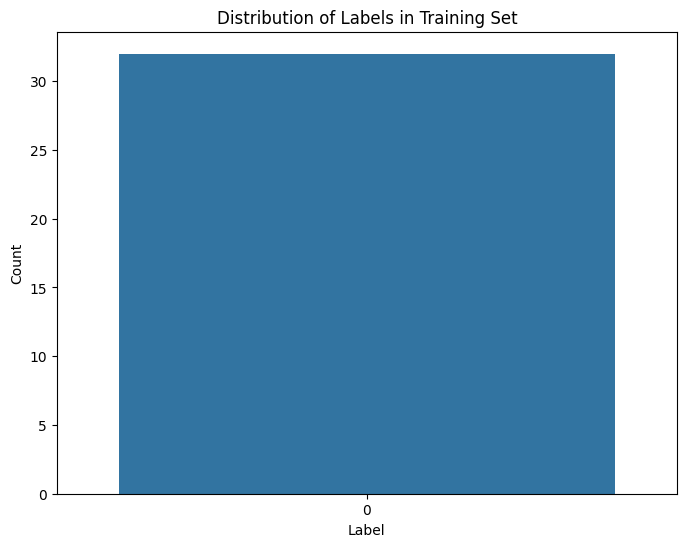

In [ ]:

# Analyze image shapes and data types
print("Image shape:", images.shape)
print("Label shape:", labels.shape)
print("Image data type:", images.dtype)
print("Label data type:", labels.dtype)

# Convert one-hot encoded labels to class indices
label_indices = np.argmax(labels, axis=1)
# Create pandas Series from the class indices
label_counts = pd.Series(label_indices).value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title("Distribution of Labels in Training Set")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()

In [ ]:
# Calculate the mean and standard deviation of pixel values for each channel (RGB)
mean_pixel_values = np.mean(images, axis=(0, 1, 2))
std_pixel_values = np.std(images, axis=(0, 1, 2))
print("Mean Pixel Values:", mean_pixel_values)
print("Standard Deviation of Pixel Values:", std_pixel_values)

Mean Pixel Values: [0.5156972  0.48179352 0.3960351 ]
Standard Deviation of Pixel Values: [0.16825911 0.17173873 0.21299043]


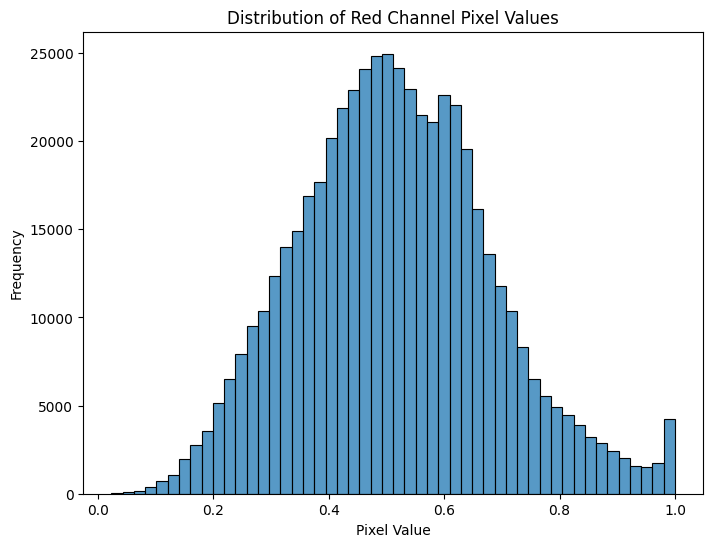

In [ ]:
# Analyze the distribution of pixel values for a specific channel (e.g., Red)
red_channel_values = images[:, :, :, 0].flatten()
plt.figure(figsize=(8, 6))
sns.histplot(red_channel_values, bins=50)
plt.title("Distribution of Red Channel Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

**Building the CNN Model**

In [ ]:
from tensorflow.keras import layers, models , regularizers
from tensorflow.keras.layers import Dropout

In [ ]:
# Build CNN model with regularization and dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),  # Add dropout after the first MaxPooling layer
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),  # Add dropout after the second MaxPooling layer
    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),  # Add dropout after the third MaxPooling layer
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.5),  # Add dropout before the output layer
    layers.Dense(train_generator.num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using the training data and validate using validation data
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20  # Adjust the number of epochs as needed
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7937 - loss: 0.6350 - val_accuracy: 1.0000 - val_loss: 0.3403
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.3343 - val_accuracy: 1.0000 - val_loss: 0.3194
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.3166 - val_accuracy: 1.0000 - val_loss: 0.3078
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 1.0000 - loss: 0.3048 - val_accuracy: 1.0000 - val_loss: 0.2942
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 1.0000 - loss: 0.2904 - val_accuracy: 1.0000 - val_loss: 0.2777
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 0.2737 - val_accuracy: 1.0000 - val_loss: 0.2609
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 1.0000 - loss: 0.2572 - val_accuracy: 1.0000 - val_loss: 0.2456
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 1.0000 - loss: 0.2422 - val_accuracy: 1.0000 - val_loss: 0.2315
Epoch 9/20
6

In [ ]:
#Model Evaluation on train set
train_loss,train_acc = model.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.1276


In [ ]:
#model Evaluation on valid set
val_loss,val_acc = model.evaluate(validation_generator)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 1.0000 - loss: 0.1276


In [ ]:
model.save("coconutfruitCNN_model.h5")

In [ ]:
model.save("coconutfruitCNN_model.keras")

**Model Evaluation (Confusion Matrix and Metrics)**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step
              precision    recall  f1-score   support

      images       1.00      1.00      1.00        28

    accuracy                           1.00        28
   macro avg       1.00      1.00      1.00        28
weighted avg       1.00      1.00      1.00        28



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


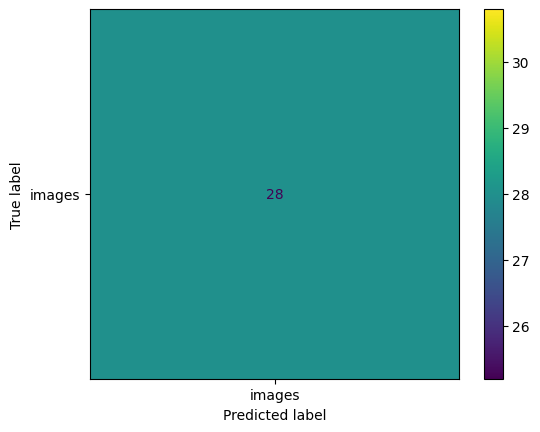

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

# Predict on test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels from test data
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Get the actual class labels present in y_true and y_pred_classes
# This ensures labels match the confusion matrix dimensions
unique_labels = np.unique(np.concatenate((y_true, y_pred_classes)))
display_labels = [k for k, v in test_generator.class_indices.items() if v in unique_labels]

cmd = ConfusionMatrixDisplay(cm, display_labels=display_labels)
cmd.plot()

# Classification report
# Use the same display_labels for consistency
print(classification_report(y_true, y_pred_classes, target_names=display_labels))

In [ ]:
# saving model to drive
model.save('/content/drive/MyDrive/coconutfruitCNN.keras')
model.save('/content/drive/MyDrive/coconutfruitCNN.h5')

In [ ]:
history.history

{'accuracy': [0.9144384860992432,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [0.47288790345191956,
  0.330354243516922,
  0.31456536054611206,
  0.30254366993904114,
  0.2874360978603363,
  0.2706616520881653,
  0.2543044090270996,
  0.23969648778438568,
  0.22582511603832245,
  0.21329645812511444,
  0.20181025564670563,
  0.19121679663658142,
  0.18170025944709778,
  0.172723650932312,
  0.16446177661418915,
  0.1567661613225937,
  0.14957387745380402,
  0.14300699532032013,
  0.13674752414226532,
  0.1309005618095398],
 'val_accuracy': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'val_loss': [0.3402698338031769,
  0.3194180130958557,
  0.3077806830406189,
  0.29424163699150085,
  0.2776816189289093,
  0.26093676686286926,
  0.24555638432502747,
  0.23148295283317566,
  0.21845564246177673,


**Accuracy Visualization**

In [ ]:
epochs = [i for i in range(1,21)]
epochs

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

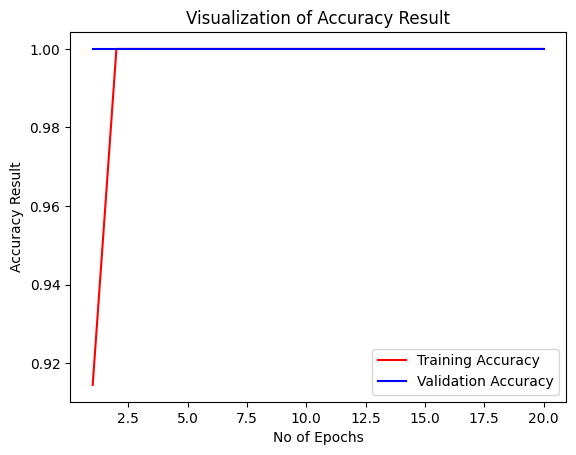

In [ ]:
# Generate a list of epoch numbers corresponding to the training history
epochs = [i for i in range(1, len(history.history['accuracy']) + 1)]

# Plot the training and validation accuracy against the epoch numbers
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

In [ ]:

print(train_generator.class_indices.keys())

dict_keys(['images', 'labels'])


In [ ]:
y_pred = model.predict(train_generator )
y_pred,y_pred.shape

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 311ms/step


(array([[1.00000000e+00, 2.14650958e-31],
        [1.00000000e+00, 3.09281840e-28],
        [1.00000000e+00, 6.98248685e-30],
        [1.00000000e+00, 5.79525019e-29],
        [1.00000000e+00, 1.17422889e-27],
        [1.00000000e+00, 5.14621192e-28],
        [1.00000000e+00, 8.79044732e-27],
        [1.00000000e+00, 2.05469536e-29],
        [1.00000000e+00, 3.11564035e-26],
        [1.00000000e+00, 3.12717428e-21],
        [1.00000000e+00, 2.42667342e-28],
        [1.00000000e+00, 2.77618372e-28],
        [1.00000000e+00, 1.80128030e-29],
        [1.00000000e+00, 2.96466629e-24],
        [1.00000000e+00, 2.05808843e-25],
        [1.00000000e+00, 1.71450690e-26],
        [1.00000000e+00, 1.29219587e-24],
        [1.00000000e+00, 1.48949376e-25],
        [1.00000000e+00, 8.11434653e-26],
        [1.00000000e+00, 9.39210263e-28],
        [1.00000000e+00, 7.69822245e-29],
        [1.00000000e+00, 8.82696834e-28],
        [1.00000000e+00, 6.72433602e-26],
        [1.00000000e+00, 7.8352586

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
Shape of predictions: (1, 2)
Predictions: [[1.000000e+00 9.560658e-29]]
Predicted class: images


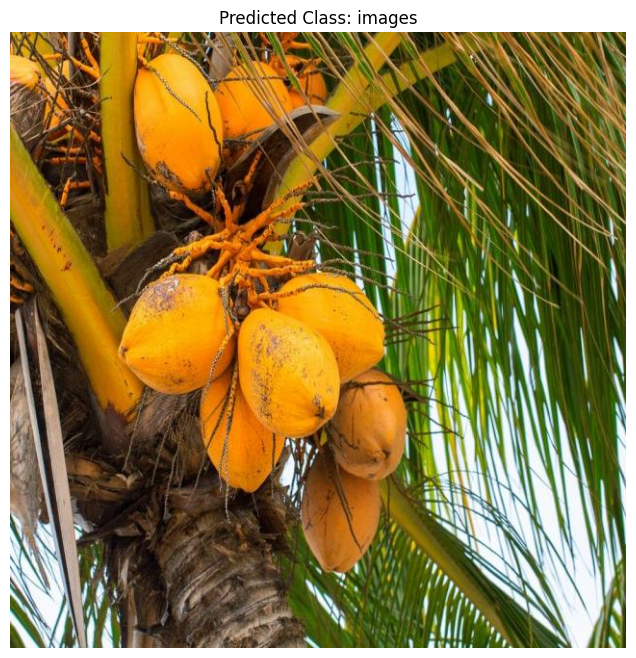

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/content/coconutfruitCNN_model.keras')

# Load the test image
image_path = '/content/coconut/test/images/00011_jpg.rf.b959217cc39f290e6ec84f3187dd4959.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Get the input shape from the model itself
input_shape = model.input_shape

# Resize the input image to match the expected shape
input_image = cv2.resize(image_rgb, (input_shape[1], input_shape[2]))

input_image = input_image / 255.0  # Normalize the image
input_image = np.expand_dims(input_image, axis=0)  # Add batch dimension

# Make predictions
predictions = model.predict(input_image)

# Print the shape and content of predictions to understand the model's output
print("Shape of predictions:", predictions.shape)
print("Predictions:", predictions)

# Assuming your model outputs class probabilities, access them accordingly
# Example:
predicted_class_index = np.argmax(predictions[0])  # Get the index of the highest probability class

# Define class labels (customize according to your dataset)
class_labels = ['images', 'labels']  # Replace with your actual class labels

# Print the predicted class label
predicted_class_label = class_labels[predicted_class_index]
print("Predicted class:", predicted_class_label)


# Display the image
plt.figure(figsize=(12, 8))
plt.imshow(image_rgb)
plt.title(f"Predicted Class: {predicted_class_label}") # Set the title to the predicted class label
plt.axis('off')
plt.show()